In [76]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [77]:
trans = transforms.ToTensor()    #convert (PIL_image or ndarray)-> torch.Float Tensor    ?????
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data",train=True,transform=trans,download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data",train=False,transform=trans,download=True
)

In [78]:
len(mnist_train),len(mnist_test)

(60000, 10000)

In [79]:
mnist_test[0][0].shape

torch.Size([1, 28, 28])

In [80]:
def get_fashion_mnist_labels(labels):
    """return dataset's labels"""
    text_labels = ['T-shirt','trouser','pullover','dress','coat','scandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

In [81]:
def show_images(imgs,num_rows,num_cols,titles=None,scale=5):
    """draw pictures list"""
    figsize = (num_rows*scale,num_cols*scale)
    _,axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    axes = axes.flatten()
    for i,(ax, img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor:
            #picture tensor
            ax.imshow(img.numpy())
        else:
            #PIL
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'T-shirt'}>,
       <Axes: title={'center': 'T-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'T-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'scandal'}>,
       <Axes: title={'center': 'scandal'}>,
       <Axes: title={'center': 'T-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'scandal'}>,
       <Axes: title={'center': 'scandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'T-shirt'}>], dtype=object)

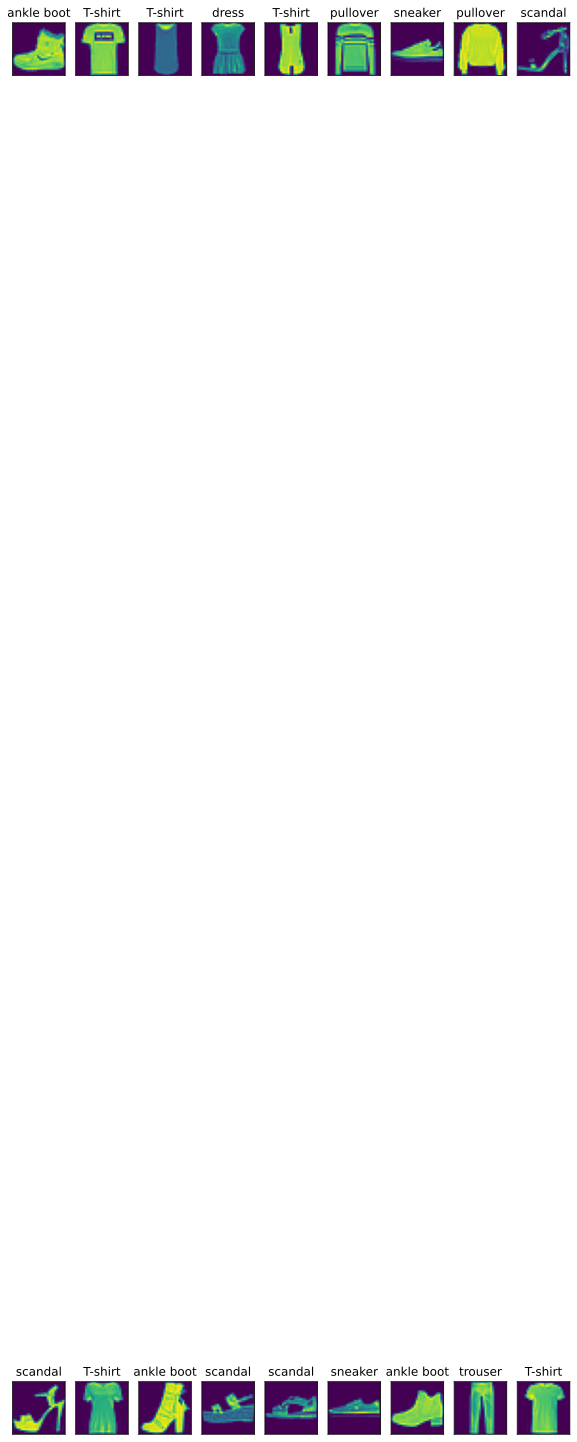

In [82]:
X,y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

In [83]:
batch_size = 256

def get_dataloader_workers():
    return 4

train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

In [84]:
timer = d2l.Timer()
for X,y in train_iter:
    continue
x = timer.stop()
x

9.962589502334595

In [89]:
def load_data_fashion_mnist(batch_size,resize=None):
    """download dataset and add to internal storage"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)                           #?????
    
    mnist_train = torchvision.datasets.FashionMNIST(
    root="../data",train=True,transform=trans,download=True
    )
    mnist_test = torchvision.datasets.FashionMNIST(
    root="../data",train=False,transform=trans,download=True
    )
    
    return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test,batch_size,shuffle=True,num_workers=get_dataloader_workers()))

In [90]:
train_iter,test_iter = load_data_fashion_mnist(32,resize=64)
for X,y in train_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [97]:
iter4=iter([10,5,2,4,23])
while True:
        x = next(iter4)    # 获取下一个元素
        print(x)

10
5
2
4
23


StopIteration: 